In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt   
import folium 
import seaborn as sns 
plt.style.use('seaborn')
import plotly.express as px
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_house = pd.read_csv('kc_house_data.csv')

In [3]:
#clean date
clean_date = df_house.date.apply(lambda x: x.split('T')[0])
clean_date

#clean date column
df_house['date'] = clean_date
df_house.head()

#format date column
df_house['date'] = pd.to_datetime(df_house['date'], format = '%Y/%m/%d')
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df_house.date = df_house.date.astype(np.int64)

In [5]:
#remove outliers outside of 2 standard diviations
z_scores = stats. zscore(df_house)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2).all(axis=1)
df_house_2std = df_house[filtered_entries]

In [6]:
df_house_2std

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,1413158400000000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,5631500400,1424822400000000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,1954400510,1424217600000000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,1321400060,1403827200000000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
8,2414600126,1429056000000000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21607,2997800021,1424304000000000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21609,6600060120,1424649600000000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,1403481600000000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,1421366400000000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9715d2b390>,
      dtype=object)

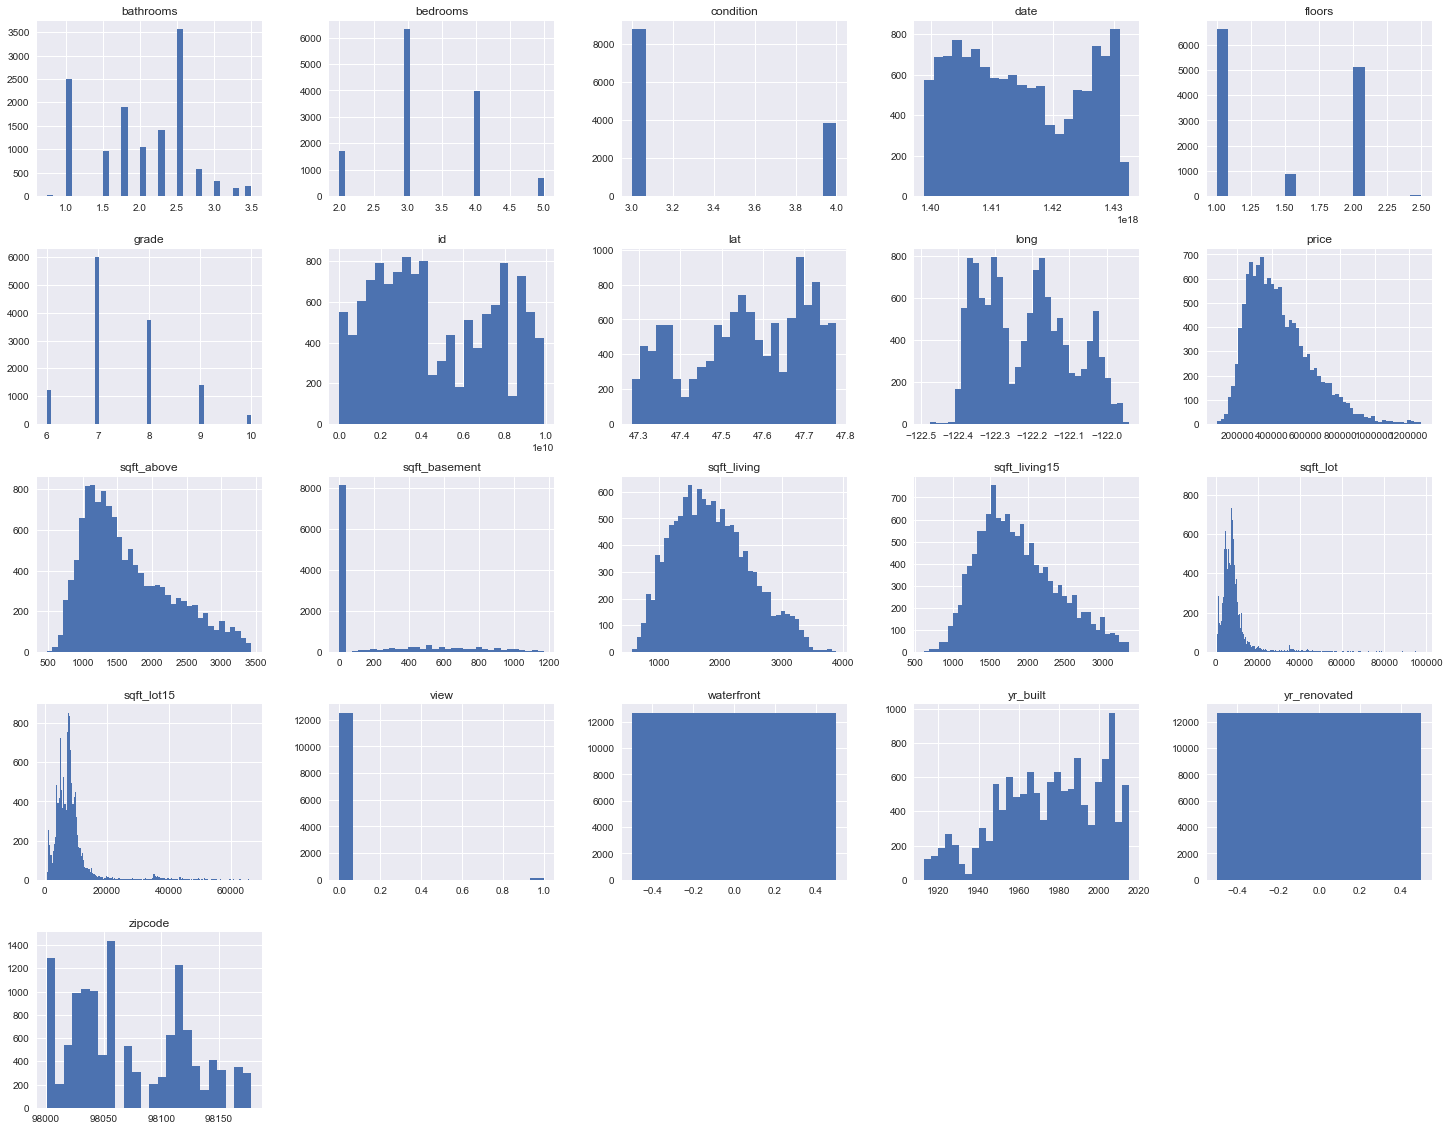

In [7]:
df_house_2std.hist(figsize=(25,20), bins='auto')

In [8]:
#houses within this price range do not have waterfront views and generally were not renovated
df_house_2std.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.007779,0.026160,-0.005780,0.030379,0.018458,-0.108530,0.032897,NaN,0.007685,...,0.049810,0.019062,-0.001870,0.027347,NaN,-0.017216,0.002674,0.006598,0.023373,-0.097857
date,0.007779,1.000000,0.002255,-0.014255,-0.035609,-0.032344,-0.016181,-0.029060,NaN,0.017513,...,-0.042875,-0.032045,0.000626,-0.028919,NaN,0.006642,-0.034123,-0.021298,-0.032193,-0.022355
price,0.026160,0.002255,1.000000,0.250478,0.376706,0.560352,0.105255,0.274273,NaN,0.112028,...,0.596061,0.481312,0.133343,0.101111,NaN,-0.053083,0.458320,0.156784,0.511693,0.111024
bedrooms,-0.005780,-0.014255,0.250478,1.000000,0.454311,0.592598,0.124304,0.232707,NaN,0.017255,...,0.307184,0.490512,0.177135,0.208880,NaN,-0.194160,-0.072614,0.201341,0.407644,0.128176
bathrooms,0.030379,-0.035609,0.376706,0.454311,1.000000,0.695700,0.030860,0.581673,NaN,0.017994,...,0.595336,0.617041,0.127531,0.662622,NaN,-0.280951,-0.068542,0.349973,0.536886,0.042828
sqft_living,0.018458,-0.032344,0.560352,0.592598,0.695700,1.000000,0.216331,0.464913,NaN,0.055377,...,0.689560,0.866475,0.223263,0.435053,NaN,-0.251615,-0.011667,0.348237,0.744917,0.227168
sqft_lot,-0.108530,-0.016181,0.105255,0.124304,0.030860,0.216331,1.000000,-0.093176,NaN,0.013603,...,0.137586,0.203379,0.017187,-0.030821,NaN,-0.138479,-0.011041,0.241982,0.270114,0.850087
floors,0.032897,-0.029060,0.274273,0.232707,0.581673,0.464913,-0.093176,1.000000,NaN,-0.027270,...,0.496034,0.625778,-0.331511,0.607661,NaN,-0.141258,-0.064346,0.276503,0.376695,-0.085483
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,0.007685,0.017513,0.112028,0.017255,0.017994,0.055377,0.013603,-0.027270,NaN,1.000000,...,0.045836,0.004131,0.097987,-0.048775,NaN,0.048564,0.013709,-0.071918,0.074266,0.007673


In [9]:
#droping waterfont and yr_renovated columns
df_house_2std.drop(['waterfront', 'yr_renovated'], axis=1, inplace=True)

/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
df_house_2std.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.007779,0.026160,-0.005780,0.030379,0.018458,-0.108530,0.032897,0.007685,-0.032753,0.049810,0.019062,-0.001870,0.027347,-0.017216,0.002674,0.006598,0.023373,-0.097857
date,0.007779,1.000000,0.002255,-0.014255,-0.035609,-0.032344,-0.016181,-0.029060,0.017513,-0.026086,-0.042875,-0.032045,0.000626,-0.028919,0.006642,-0.034123,-0.021298,-0.032193,-0.022355
price,0.026160,0.002255,1.000000,0.250478,0.376706,0.560352,0.105255,0.274273,0.112028,-0.000106,0.596061,0.481312,0.133343,0.101111,-0.053083,0.458320,0.156784,0.511693,0.111024
bedrooms,-0.005780,-0.014255,0.250478,1.000000,0.454311,0.592598,0.124304,0.232707,0.017255,-0.000873,0.307184,0.490512,0.177135,0.208880,-0.194160,-0.072614,0.201341,0.407644,0.128176
bathrooms,0.030379,-0.035609,0.376706,0.454311,1.000000,0.695700,0.030860,0.581673,0.017994,-0.192242,0.595336,0.617041,0.127531,0.662622,-0.280951,-0.068542,0.349973,0.536886,0.042828
sqft_living,0.018458,-0.032344,0.560352,0.592598,0.695700,1.000000,0.216331,0.464913,0.055377,-0.108942,0.689560,0.866475,0.223263,0.435053,-0.251615,-0.011667,0.348237,0.744917,0.227168
sqft_lot,-0.108530,-0.016181,0.105255,0.124304,0.030860,0.216331,1.000000,-0.093176,0.013603,0.098914,0.137586,0.203379,0.017187,-0.030821,-0.138479,-0.011041,0.241982,0.270114,0.850087
floors,0.032897,-0.029060,0.274273,0.232707,0.581673,0.464913,-0.093176,1.000000,-0.027270,-0.299489,0.496034,0.625778,-0.331511,0.607661,-0.141258,-0.064346,0.276503,0.376695,-0.085483
view,0.007685,0.017513,0.112028,0.017255,0.017994,0.055377,0.013603,-0.027270,1.000000,0.029349,0.045836,0.004131,0.097987,-0.048775,0.048564,0.013709,-0.071918,0.074266,0.007673
condition,-0.032753,-0.026086,-0.000106,-0.000873,-0.192242,-0.108942,0.098914,-0.299489,0.029349,1.000000,-0.175077,-0.175507,0.134054,-0.360535,-0.064643,-0.034790,-0.077173,-0.104480,0.115062


In [11]:
neededCols_2std = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
            'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
            'sqft_living15', 'sqft_lot15']

regression_data_2std = df_house_2std[neededCols_2std]

In [15]:
#regression model with outliers removed

X = regression_data_2std.drop(['price'], axis=1)
y = regression_data_2std['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lm = linear_model.LinearRegression() 

model = lm.fit(X_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                        'view', 'condition', 'grade', 'sqft_above',
                        'sqft_basement', 'yr_built', 'sqft_living15',
                        'sqft_lot15']], y_train)

lm = sm.OLS(y_train, X_train)
model_2std = lm.fit()
model_2std.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              9141.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):                        0.00
Time:                        12:39:28   Log-Likelihood:                     -1.3463e+05
No. Observations:               10141   AIC:                                  2.693e+05
Df Residuals:                   10129   BIC:                                  2.694e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -1.126e+04   2347.556     -4.797      0.000   -1.59e+04   -6659.946
bathrooms     -2.833e+04   3489.430     -8.118      0.000   -3.52e+04   -2.15e+04
sqft_living      69.0014      3.079     22.410      0.000      62.966      75.037
sqft_lot          0.0729      0.295      0.247      0.805      -0.505       0.651
floors         1.933e+04   4502.620      4.294      0.000    1.05e+04    2.82e+04
view           9.829e+04   1.26e+04      7.815      0.000    7.36e+04    1.23e+05
condition      4.273e+04   3148.792     13.569      0.000    3.66e+04    4.89e+04
grade          9.426e+04   2439.396     38.640      0.000    8.95e+04     9.9e+04
sqft_above        5.1750      2.854      1.813      0.070      -0.419      10.769
sqft_basement    63.8264      3.404     18.749      0.000      57.153      70.500
yr_built       -283.8741      9.933    -28.578      0.000    -303.345    -264.403
sqft_living15    45.4846      4.296     10.589      0.000      37.065      53.905
sqft_lot15       -1.4183      0.367     -3.866      0.000      -2.137      -0.699
==============================================================================
Omnibus:                     1064.231   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1864.738
Skew:                           0.725   Prob(JB):                         0.00
Kurtosis:                       4.520   Cond. No.                     1.51e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.31e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

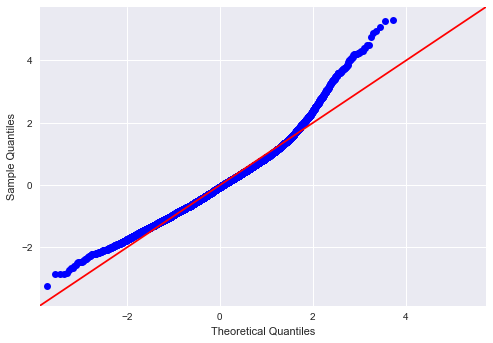

In [25]:
fig = sm.graphics.qqplot(model_2std.resid, dist=stats.norm, line='45', fit=True)

In [18]:
print('Model Accuracy:', model.score(X_test,y_test))
print('MSE for train set:', np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
print('MSE for test set:', np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
print('Cross Validation:', cross_val_score(model, X_train, y_train, cv = 100, scoring = "r2").mean())

Model Accuracy: 0.5045392837101192
MSE for train set: 134346.4896760127
MSE for test set: 129440.00365858694
Cross Validation: 0.48105369002692056


In [19]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
7533,2,1.00,810,4368,1.0,0,3,6,810,0,1958,1890,5253
18433,3,1.75,1350,7686,1.0,0,3,7,1350,0,1987,1370,7686
11973,4,2.50,2850,11000,2.0,0,3,8,2850,0,1998,1720,11000
6163,4,2.25,2680,35218,2.0,0,3,8,2680,0,1986,2980,35218
2279,2,1.50,1480,1349,2.0,0,3,7,1240,240,2007,1550,1349
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20392,4,2.50,2560,7210,2.0,0,3,9,2560,0,2006,2160,10439
8832,4,2.00,2100,12620,1.0,0,4,7,2100,0,1972,1720,7840
9182,2,1.00,1140,5100,1.0,0,3,7,1140,0,1942,1230,5100
1458,3,2.25,2400,5300,1.5,0,4,7,1250,1150,1939,1540,4800


In [20]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
2936,4,2.50,3130,60467,2.0,0,3,9,3130,0,1996,2780,44224
20690,4,2.50,1812,5026,2.0,0,3,8,1812,0,2011,2440,6007
19988,4,2.50,2820,6120,2.0,0,3,9,2820,0,2014,1510,6120
2173,3,2.50,1670,8364,1.0,0,4,7,1300,370,1990,1490,8143
8513,4,1.75,2160,8000,1.0,0,4,9,1660,500,1976,2350,8200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19408,3,3.50,2070,11658,1.0,0,4,8,1370,700,1977,1930,8744
16411,5,2.00,2330,6783,1.0,0,3,7,1310,1020,1956,1930,6783
6008,3,1.00,1450,9586,2.0,0,3,7,1450,0,1950,1500,8592
18249,4,2.50,2740,8336,2.0,0,4,9,2740,0,1990,2460,9189


In [23]:
y_test

2936     685530.0
20690    370000.0
19988    897000.0
2173     270000.0
8513     355000.0
           ...   
19408    470000.0
16411    630000.0
6008     340000.0
18249    395000.0
10218    305000.0
Name: price, Length: 2536, dtype: float64

In [24]:
y_train

7533     450000.0
18433    261000.0
11973    760000.0
6163     390000.0
2279     418000.0
           ...   
20392    838000.0
8832     500000.0
9182     400000.0
1458     672500.0
12409    235000.0
Name: price, Length: 10141, dtype: float64